# PHY 604 Homework1

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

### (a)

Based on the solution of $ax^2+bx+c=0$, which is shown below, we can expand the part with square root according to Maclaurin Expansion.

$$x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$

$$\sqrt{b^2-4ac}=|b|\sqrt{1-\frac{4ac}{b^2}}=|b|(1-\frac{1}{2}\frac{4ac}{b^2}-\frac{1}{8}\frac{16a^2c^2}{b^4}+\dots)=|b|-\frac{2ac}{|b|}-\frac{2a^2c^2}{|b|^3}+\dots$$

Then with this expansion, we can rewrite the solutions. If $b\ge0$:

$$x_+=\frac{-b+|b|-\frac{2ac}{|b|}-\frac{2a^2c^2}{|b|^3}+\dots}{2a}=-\frac{c}{b}-\frac{ac^2}{b^3}+\dots$$

$$x_-=\frac{-b-|b|-\frac{2ac}{|b|}-\frac{2a^2c^2}{|b|^3}+\dots}{2a}=-\frac{b}{a}-\frac{c}{b}-\frac{ac^2}{b^3}+\dots$$

If $b\le0$:

$$x_+=\frac{-b+|b|-\frac{2ac}{|b|}-\frac{2a^2c^2}{|b|^3}+\dots}{2a}=-\frac{b}{a}+\frac{c}{b}+\frac{ac^2}{b^3}+\dots$$

$$x_-=\frac{-b-|b|-\frac{2ac}{|b|}-\frac{2a^2c^2}{|b|^3}+\dots}{2a}=\frac{c}{b}+\frac{ac^2}{b^3}+\dots$$

When $b>>a$ and $b>>c$, we can see no matter $b\le 0$ or $b\ge 0$, one solution is composed of subtracting close large numbers, which leads to roundoff errors.

### (b)

If we set $D = b^2-4ac$, then when $b\ge0$, the unstable solution is $x_+=\frac{-b+\sqrt{D}}{2a}$. Solutions for this situation can be rewritten as:

$$x_+=\frac{(-b+\sqrt{D})}{2a}\frac{(-b-\sqrt{D})}{(-b-\sqrt{D})}=\frac{b^2-b^2+4ac}{2a(-b-\sqrt{D})}=\frac{2c}{-b-\sqrt{D}}$$

$$x_-=\frac{-b-\sqrt{D}}{2a}$$

Similarly, if $b\le0$, the solutions can be rewritten as:

$$x_+ = \frac{-b+\sqrt{D}}{2a}$$

$$x_-=\frac{(-b-\sqrt{D})}{2a}\frac{(-b+\sqrt{D})}{(-b+\sqrt{D})}=\frac{b^2-b^2+4ac}{2a(-b+\sqrt{D})}=\frac{2c}{-b+\sqrt{D}}$$

If we set $q=\frac{1}{2}(-b-sign(b)\sqrt{b^2-4ac})$, then we can conclude the solutions for these 2 different situations with smaller error:

$$x_1=\frac{c}{q},\, x_2=\frac{q}{a},\,\,\text{where }q=\frac{1}{2}(-b-sign(b)\sqrt{b^2-4ac})$$

## Problem 2

$$e^x=S_n(x)\simeq 1+\frac{x}{1!}+\frac{x^2}{2!}+\frac{x^3}{3!}+\dots+\frac{x^n}{n!}$$

### (a)

In [2]:
def exp_series(x, n):
    term = 1.0
    s = 1
    
    for k in range(1, n+1):
        term = (term * x)/ k
        s = s + term
        
    return s

In [3]:
exp_series(1,10)

2.7182818011463845

### (b)

If n is between $n=0$ and $n=100$, then the range of n should be (0, 100). Since we have the function to calculate $e^x$ with different n, we can create a list first to store $e^x$ with specfic x from $n=1$ to $n=99$. Though we choose this n range here, we can still change 100 to 101 to have $e^x$ and corresponding $\epsilon_n$ when $n=100$ if we need.

In [4]:
def exp_series_100(x):
    S_n_x = []
    
    for n in range(0, 100):
            new_S_n_x = exp_series(x, n)
            S_n_x.append(new_S_n_x)
            
    return S_n_x

With equation $\epsilon_n=\frac{|e^x - S_n(x)|}{e^x}$, we can have another list to store $\epsilon_n$ from $n=0$ to $n=99$.

In [5]:
def epsilon_n(x):
    S_n_x_error = []
    e_x = np.exp(x)
    S_n_x = exp_series_100(x)
    
    for item in S_n_x:
        error = abs(e_x - item)/ e_x
        S_n_x_error.append(error)
        
    return S_n_x_error

In [6]:
def plot_eps_vs_n(posi_x, nega_x, labels=None, loglog=True, save=None):
    ns = np.arange(1, 101)
    epsilon_posi_x = epsilon_n(posi_x)
    epsilon_nega_x = epsilon_n(nega_x)    

    plt.figure(figsize=(7,4.5))
    plt.loglog(ns, epsilon_posi_x, 'o-', markersize=2.5, label=fr"x = {posi_x}")  
    plt.loglog(ns, epsilon_nega_x, 'o-', markersize=2.5, label=fr"x = {nega_x}")  
    plt.xlabel('n')
    plt.ylabel(r'$\epsilon_n$')
    plt.title('Error vs n (log–log)') 
    plt.grid(True, which='both', ls=':')
    plt.legend()
    plt.tight_layout() 
    plt.show()

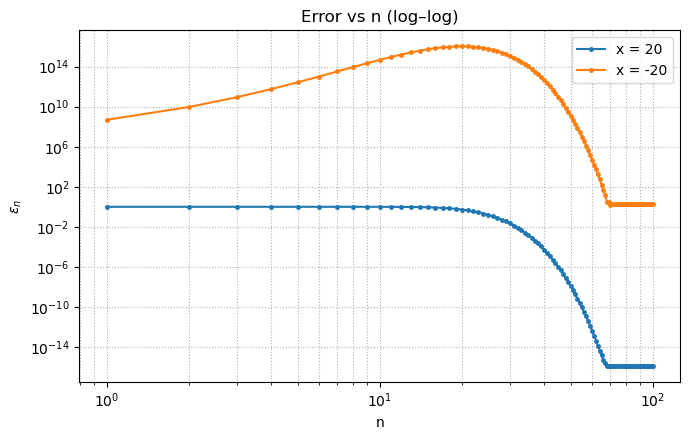

In [7]:
plot_eps_vs_n(20, -20)

When $x=20$, the error decreases rapidly as n increases. Once n is large enough, the curve hits a numerical “error floor” at about $10^{−16}$ which is also called the machine precision of double precision, so increasing n further yields essentially no improvement. When $x=-20$, the error first grows and then decays, which means that for negative x, the series is alternating. The first dozens of terms increase in magnitude, causing large cancellations that amplify the relative error. When n becomes large enough, the curve then falls steeply and finally flattens again when it becomes limited by machine precision.

### (c)

Because $e^{-x}=(e^{x})^{-1}$, we can calculate $e^x$ first and then take its reciprocal. We can simply improved the function defining the calculation of $e^x$.

In [8]:
def exp_series(x, n):
    x_abs = abs(x)
    term = 1.0
    s = 1
    
    for k in range(1, n+1):
        term = (term * x_abs)/ k
        s = s + term
    if x >= 0:
        return s
    else:
        return 1/s

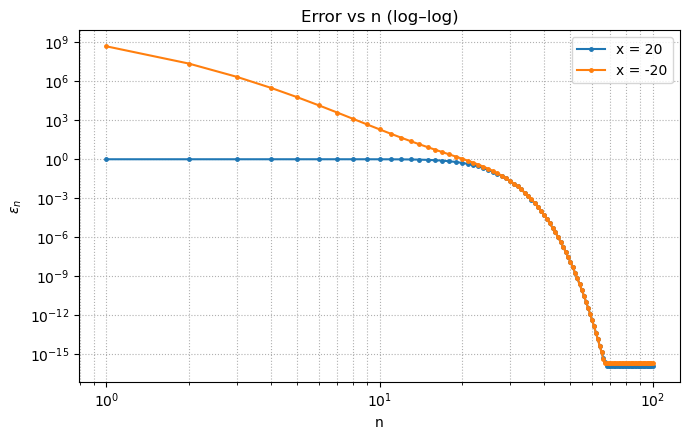

In [9]:
plot_eps_vs_n(20, -20)

## Problem 3

For $f(x)=sin(x)$, its derivate is $f'(x)=cos(x)$. When $x=\frac{\pi}{4}$, $f'(\frac{\pi}{4})=\frac{\sqrt{2}}{2}$.

In [10]:
x0 = np.pi / 4
f = np.sin

true_deriv = np.cos(x0) 
print(true_deriv)

0.7071067811865476


According to the expression of first-order forward difference, second-order central difference, and fourth-order central difference below:

$$D_1=\frac{f(x+h)-f(x)}{h}, O(h)$$

$$D_2=\frac{f(x+h)-f(x-h)}{2h}, O(h^2)$$

$$D_4=\frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h}, O(h^4)$$

we can define the functions of them.

In [11]:
def diff(f, x, h):
    return (f(x + h) - f(x)) / h

def diff_2(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def diff_4(f, x, h):
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12 * h)

Let's define 400 points between $10^{-16}$ to 1 and calculate the difference and their error using first-order forward difference. We can also calculate for second-order central difference and fourth-order central difference case.

In [12]:
h = np.logspace(-16, 0, 400) 

D1 = diff(f, x0, h)
D2 = diff_2(f, x0, h)
D4 = diff_4(f, x0, h)

err1 = np.abs(D1 - true_deriv)
err2 = np.abs(D2 - true_deriv)
err4 = np.abs(D4 - true_deriv)

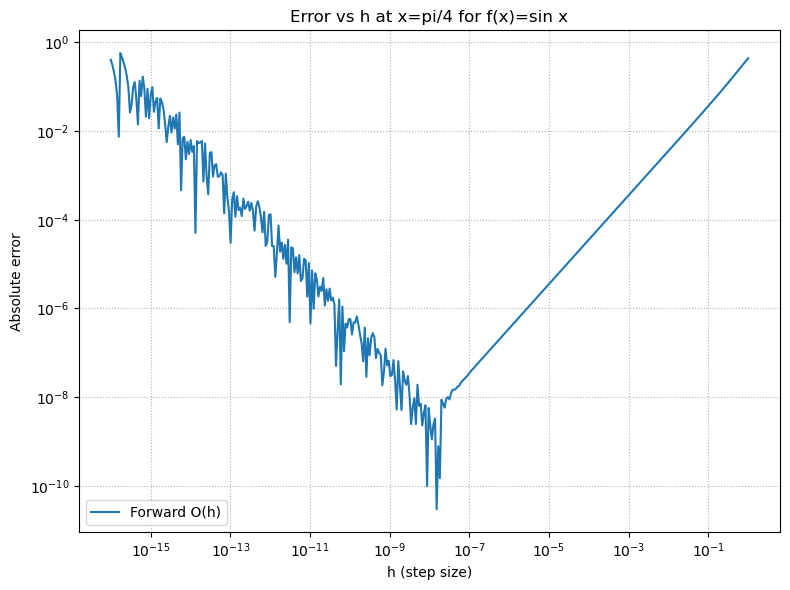

In [13]:
plt.figure(figsize=(8,6))
plt.loglog(h, err1, label="Forward O(h)")

plt.xlabel("h (step size)")
plt.ylabel("Absolute error")
plt.title("Error vs h at x=pi/4 for f(x)=sin x")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()

As $\Delta x$ decreases from large values, the error decreases approximately linearly on the log–log plot, consistent with the first-order truncation error of the forward difference scheme. However, for very small $\Delta x$, the error stops decreasing and instead grows rapidly. This is because round-off errors due to finite precision arithmetic dominate: the subtraction $f(x+\Delta x)−f(x)$ loses significant digits when $\Delta x$ is tiny, and dividing by a small number amplifies this loss. The overall error is the result of a balance between truncation error and round-off error, leading to the characteristic U-shaped curve.

Then we can plot for second-order central difference.

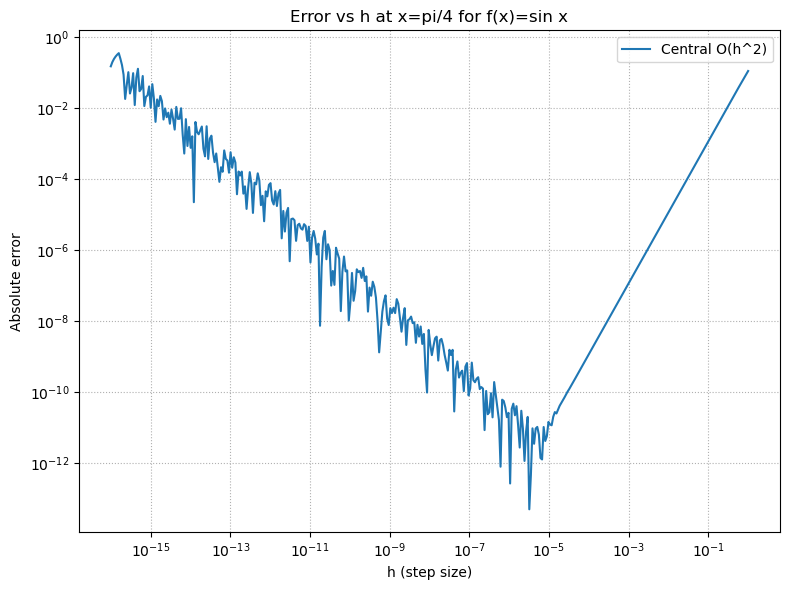

In [14]:
plt.figure(figsize=(8,6))
plt.loglog(h, err2, label="Central O(h^2)")

plt.xlabel("h (step size)")
plt.ylabel("Absolute error")
plt.title("Error vs h at x=pi/4 for f(x)=sin x")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()

For the second-order central difference scheme, the error curve has the same U-shape as in the forward difference case. For moderate step sizes, the error decreases approximately as $\Delta x^2$, which is reflected by a slope of about 2 on the log–log plot. For very small $\Delta x$, the error increases again due to round-off, just as in the first-order method. Compared with the forward difference, the minimum error is much smaller, and the optimal step size shifts to the right, meaning that we can use a larger $\Delta x$ and still achieve high accuracy.

In the end, we can plot for fourth-order central difference.

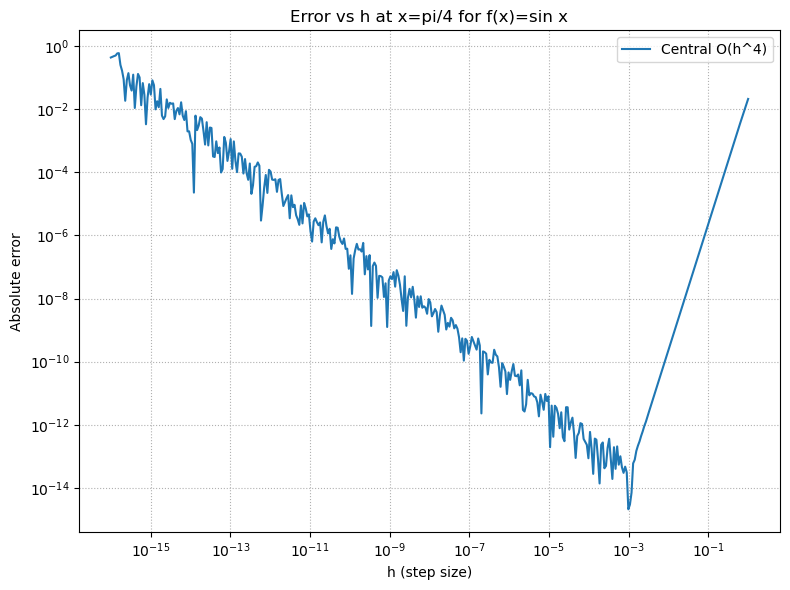

In [15]:
plt.figure(figsize=(8,6))
plt.loglog(h, err4, label="Central O(h^4)")

plt.xlabel("h (step size)")
plt.ylabel("Absolute error")
plt.title("Error vs h at x=pi/4 for f(x)=sin x")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()

The fourth-order central difference scheme again produces a U-shaped error curve. In the region dominated by truncation error, the error decreases as $\Delta x^4$, giving a slope of about 4 on the log–log plot. At very small $\Delta x$, round-off error dominates and the error increases, as before. Compared with the second-order method, the minimum error is even smaller, and the optimal step size is shifted further to the right. This shows that higher-order formulas not only converge faster but also reach machine precision at relatively larger step sizes.

## Problem 4

$$I=\int_0^1sin^2(\sqrt{100x})dx$$

### (a)

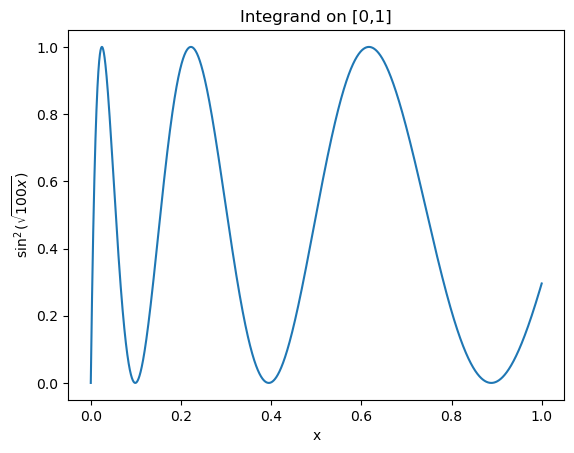

In [16]:
x = np.linspace(0, 1, 5000)          
f = np.sin(np.sqrt(100*x))**2

plt.plot(x, f)
plt.xlabel('x'); plt.ylabel(r'$\sin^2(\sqrt{100x})$')
plt.title('Integrand on [0,1]')
plt.show()

### (b)

For adaptive trapezoid rule, we can rewrite the integral:

$$I=\int_a^bf(x)dx,\quad a=0,\,b=1,\,f(x)=sin^2(\sqrt{100x})$$

In [17]:
a = 0
b =1
def f(x):
    return math.sin(math.sqrt(100.0*x))**2

First, use individual cell intervals (N=1) to perform a trapezoidal integration, and we can get I_0. Then increase N using $Ni=2N_{i-1}$ to calculate new integration $I_i$ until we have error $e_i<10^{-6}$. We can use $\epsilon_i=\frac{1}{3}(I_i-I_{i-1})$ to check the if the error is qualified. To be more effective, we use $I_i=\frac{1}{2}I_{i-1}+h_i\sum_{k}f(a+kh_i)$ to calculate $I_i$ when we have $I_{i-1}$.

In [18]:
def adaptive_trapezoid(a=0.0, b=1.0, tol=1e-6, max_iter=40):
    N  = 1
    h  = b - a
    I0 = 0.5 * h * (f(a) + f(b))
    I_prev = I0
    fevals = 2
    
    for i in range(1, max_iter+1):
        N  *= 2
        h  *= 0.5
        
        s_new = 0.0
        for m in range(1, N//2 + 1):
            x_mid = a + (2*m - 1) * h
            s_new += f(x_mid)
        fevals += N//2
            
        I_curr = 0.5 * I_prev + h * s_new
        err = abs(I_curr - I_prev) / 3.0
        
        if err < tol:
            return I_curr, err, N, i, fevals

        I_prev = I_curr

    return I_prev, err, N, max_iter, fevals

In [19]:
I_b, err_b, N_b, iters, fevals_b= adaptive_trapezoid()
print(f"I ≈ {I_b:.10f}, est_err ≈ {err_b:.2e}, N = {N_b}, iters = {iters}, function evaluations ≈ {fevals_b}")

I ≈ 0.4558320583, est_err ≈ 4.74e-07, N = 4096, iters = 12, function evaluations ≈ 4097


### (c)

First, we should use $N=1$ to calculate the trapezoidal integration $R_{1,1}$. Then increase the number of intervals by $N_i=2N_{i−1}$ which is same with (b) to calculate new trapezoidal results $R_{i,1}$. Using Richardson extrapolation, we can improve the accuracy by $R_{i,m+1}=R_{i,m}+\frac{1}{4^m-1}(R_{i,m}-R_{i-1,m})$. The error can be estimated as $\epsilon_{i,m}=\frac{1}{4^m-1}(R_{i,m}-R_{i-1,m})$. We iterate this process and check the diagonal elements $R_{i,i}$ until the error is less than $10^{-6}$. 

In [20]:
def romberg_integrate(f, a, b, tol=1e-6, max_levels=20):
    R = []               
    fevals = 0             
    
    N = 1
    h = (b - a) / N
    T_prev = 0.5 * (b - a) * (f(a) + f(b))   
    fevals += 2
    R.append([T_prev])

    for i in range(2, max_levels+1):
        N *= 2
        h *= 0.5

        s_new = 0.0
        for m in range(1, N//2 + 1):
            x_mid = a + (2*m - 1) * h
            s_new += f(x_mid)
        fevals += (N//2)

        T_curr = 0.5 * R[i-2][0] + h * s_new  
        row = [T_curr]

        for m in range(1, i):
            factor = 4.0**m - 1.0
            R_im1m = R[i-2][m-1]           
            R_im   = row[m-1]               
            R_next = R_im + (R_im - R_im1m) / factor
            row.append(R_next)

        R.append(row)

        err = abs(R[i-1][i-1] - R[i-2][i-2]) 
        if err < tol:
            return R[i-1][i-1], err, N, fevals

    return R[-1][-1], abs(R[-1][-1] - R[-2][-2]), N, fevals, R

In [21]:
I_c, err_c, N_c, fevals_c = romberg_integrate(f, 0.0, 1.0, tol=1e-6)
print(f"I ≈ {I_c:.10f}, est_err ≈ {err_c:.2e}, N = {N_c}, function evaluations ≈ {fevals_c}")

I ≈ 0.4558325323, est_err ≈ 3.78e-08, N = 128, function evaluations ≈ 129


In [22]:
print(f"N ratio (trap/Romb)      = {N_b/N_c:.2f}× fewer subintervals with Romberg")
print(f"fevals ratio (trap/Romb) = {fevals_b/fevals_c:.2f}× fewer function calls with Romberg")
print(f"|I_romberg - I_trap|     = {abs(I_c - I_b):.2e}")

N ratio (trap/Romb)      = 32.00× fewer subintervals with Romberg
fevals ratio (trap/Romb) = 31.76× fewer function calls with Romberg
|I_romberg - I_trap|     = 4.74e-07


By comparing the required number of subintervals and function evaluations, it is easy to find that the Romberg method is more efficient while maintaining the same level of accuracy as the adaptive trapezoid rule.

### (d)

In range \[-1,1\], the Gauss-Legendre integral equation woth n points is: 

$$\int_{-1}^1f(x)dx\approx\sum_{j=1}^n\omega_jf(x_j)$$

where $\{x_j,\omega_j\}$ are the roots and corresponding weights of Legendre polynomials. When range is not $[-1,1]$ but $[a,b]$, variable transformation is needed.

$$\int_a^bf(x)dx=\frac{b-a}{2}\sum_{j=1}^{n}\omega_jf(\frac{b-a}{2}x_j+\frac{a+b}{2})$$

In this case, $a=0$ and $b=1$.

In [23]:
def gauss_legendre_integrate(f, a, b, n):
    x, w = np.polynomial.legendre.leggauss(n)
    t = 0.5*(b - a)*x + 0.5*(b + a)
    
    return 0.5*(b - a) * np.sum(w * np.array([f(val) for val in t]))

The integral can be rewritten when we set $t=\sqrt{100x}$, then we have $x=\frac{t^2}{100}$, and $dx=\frac{t}{50}dt$:

$$I=\int_0^1sin^2(\sqrt{100x})dx=\frac{1}{50}\int_0^{10}tsin^2(t)dt=\frac{1}{100}\int_0^{10}t(1-cos(2t))=\frac{1}{100}(50-[5sin(20)+\frac{1}{4}cos(20)-\frac{1}{4}])$$

In [24]:
def true_integral():
    term1 = 50
    term2 = 5*math.sin(20) + 0.25*math.cos(20) - 0.25
    I = (term1 - term2) / 100.0
    
    return I

In [25]:
I_true = true_integral()

for n in range(2, 21):   
    I_n = gauss_legendre_integrate(f, 0, 1, n)
    err = abs(I_n - I_true)
    print(f"n={n:2d}, I ≈ {I_n:.10f}, error ≈ {err:.2e}")
    if err < 1e-6:
        print(f"Required order: n={n}")
        break

n= 2, I ≈ 0.6273262731, error ≈ 1.71e-01
n= 3, I ≈ 0.2360369272, error ≈ 2.20e-01
n= 4, I ≈ 0.4267093048, error ≈ 2.91e-02
n= 5, I ≈ 0.5631145323, error ≈ 1.07e-01
n= 6, I ≈ 0.4702227756, error ≈ 1.44e-02
n= 7, I ≈ 0.4564458645, error ≈ 6.13e-04
n= 8, I ≈ 0.4558444064, error ≈ 1.19e-05
n= 9, I ≈ 0.4558326554, error ≈ 1.23e-07
Required order: n=9


Using Gauss–Legendre quadrature on \[0,1\], the integral converges to $I\approx0.4558325323$. An accuracy better than $10^{−6}$ is achieved with order $n=9$.

## Problem 5

### (a)

We can define the function of $\phi(x)$ first.

$$\phi(x)=x^{a-1}e^{-x}$$

In [26]:
def phi(x, a):
    return x**(a-1) * np.exp(-x)

Then we can use this function to plot $\phi(x)$ when $a = 2,\,3,\,4$ in one figure.

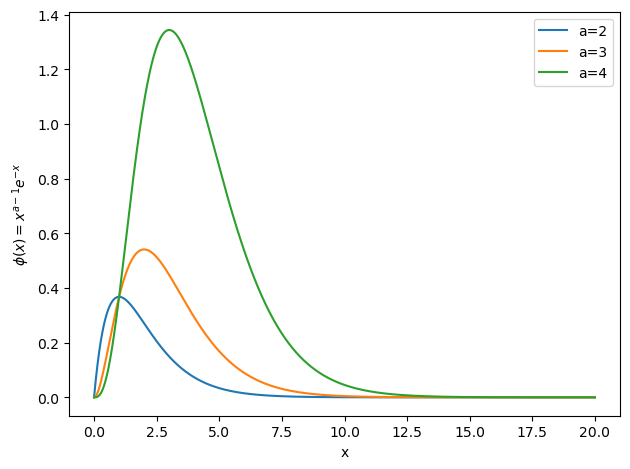

In [27]:
x = np.linspace(0, 20, 2000)

for a in [2, 3, 4]:
    plt.plot(x, phi(x, a), label=f'a={a}')

plt.xlabel('x')
plt.ylabel(r'$\phi(x)=x^{a-1}e^{-x}$')
plt.legend()
plt.tight_layout()
plt.show()

### (b)

According to the expression of $\phi(x)$, we can have the derivate of $\phi(x)$. 

$$\phi'(x)=(a-1)x^{a-2}e^{-x}-x^{a-1}e^{-x}=x^{a-2}e^{-x}[(a-1)-x]$$

Because when $a>1$, $x^{a-2}e^{-x}>0$ always holds, we only need to pay attention to $[(a-1)-x]$. Then we can see $\phi(x)$ increase in range $(0,a-1)$ and then decrease in range $(a-1,\infty)$, so we have $\phi(x)_{max}$ when $x=a-1$.

$$\phi(x)_{max}=\phi(a-1)=(a-1)^{a-1}e^{-(a-1)}$$

### (c)

Because $z=\frac{x}{x+c}$, we can:

$$x=\frac{cz}{1-z},\quad\frac{dx}{dz}=\frac{c}{(1-z)^2}$$

$$I(z)=\phi(x(z))\frac{dx}{dz}=c^a\frac{z^{a-1}}{(1-z)^{a+1}}exp(-\frac{cz}{1-z})$$

For the convenience of calculation, let's first take the logarithm of this expression：

$$lnI(z)=alnc+(a-1)lnz-(a+1)ln(1-z)-\frac{cz}{1-z}$$

If we have maximun when $z=\frac{1}{2}$, the derivative of lnI(z) should be 0 in this case.

$$\frac{d}{dz}lnI(z)=\frac{a-1}{z}+\frac{a+1}{1-z}-\frac{c}{(1-z)^2}=0$$

$$2(a-1)+2(a+1)-4c=0$$

Then we know the c should be $c=a$.

### (d)

To calculate $\Gamma(a)=\int_0^{\infty}x^{a-1}e^{-x}dx$ for a>1, map the semi-infinite interval to \[0,1\] with expression of x,z, and $\frac{dx}{dz}$ listed before.

$$\Gamma=(a)\int_0^1I(z)dz,\quad I(z)=c^a\frac{z^{a-1}}{(1-z)^{a+1}}exp(-\frac{cz}{1-z})$$

Choose c=a, then integrate $I(z)$ on \[0,1\] using Gauss–Legendre quadrature with a modest number of nodes, $N\le50$. For numerical stability, evaluate the log of the integrand and then exponentiate, using log1p(-z) for $ln(1-z)$.

$$lnI(z)=alnc+(a-1)lnz-(a+1)ln(1-z)-\frac{cz}{1-z}$$

In [28]:
def gamma_via_z(a, N=24):
    c = a
    t, w = np.polynomial.legendre.leggauss(N)
    z = 0.5*(t+1.0)
    w = 0.5*w

    logI = (a*np.log(c)
            + (a-1)*np.log(z)
            - (a+1)*np.log1p(-z)
            - (c*z)/(1.0 - z))
    I = np.exp(logI)
    return np.sum(w*I)

In [29]:
for a in [2, 3, 4, 2.5]:
    print(a, gamma_via_z(a))

2 1.000000010506601
3 2.0000000039861026
4 5.999999970420855
2.5 1.3293402872615336


With $N\approx24$, the method already reproduces reference values accurately. For examples, $\Gamma(2)=1$,  $\Gamma(3)=2$, $\Gamma(4)=6$, and $\Gamma(2.5)=\frac{3\sqrt{\pi}}{4}$, which are typically within $10^{−8}\sim10^{-7}$ relative error. Increasing N gives diminishing returns. The two main accuracy enablers are setting c=a, which spreads the integrand over \[0,1\], and computing $I(z)$ via its log form to suppress roundoff and overflow/underflow near the endpoints.